In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:

df = pd.read_csv('steel_date.csv')

In [4]:
df['SPEC'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 720 entries, 0 to 719
Series name: SPEC
Non-Null Count  Dtype 
--------------  ----- 
720 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [5]:
df.head()

,Unnamed: 0,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [6]:
steel = df.copy()

In [7]:
steel['SCALE'] = steel['SCALE'].replace({'양품':1, '불량':0})
steel['HSB'] = steel['HSB'].replace({'적용':1, '미적용':0})

In [8]:
steel.head(1)

,Unnamed: 0,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,PB562774,2008-08-01:00:00:15,1,AB/EH32-TM,T1,32.25,3707,15109,14180,...,1144,116,1133,59,282,1133,934,1,8,2조


김경태 


In [9]:
df['FUR_NO'].unique()
df['FUR_NO_ROW'].unique()
df['STEEL_KIND'].unique()
#철의 종류는 9개
len(df['STEEL_KIND'].unique())
print(df['SPEC'].unique())
#스펙은 66개
print(len(df['SPEC'].unique()))


['AB/EH32-TM' 'NV-E36-TM' 'BV-EH36-TM' 'COMMON' 'GL-E32-TM' 'GL-E36-TM'
 'AB/EH36-TM' 'KS-HSB600' 'LR-EH36-TM' 'BV-B' 'LR-B' 'JS-SM490YB' 'KR-B'
 'LR-A' 'JS-SM490A' 'KS-SM400B' 'JS-SM400B' 'AB/B' 'KS-SS400' 'KR-A'
 'NV-A' 'JS-SS400' 'KS-SM400A' 'KS-SM490B' 'V42JBN3' 'BV-AH32'
 'JS-SM490YA' 'AB/AH32' 'LR-AH32' 'NV-B' 'NV-A32' 'KS-SM490A' 'NK-KA32'
 'GL-A32' 'AB/A' 'LR-AH36' 'A709-36' 'KR-AH32' 'A516-60' 'GL-A' 'NK-KA'
 'NV-D36-TM' 'NK-KA32-TM' 'GL-A32-TM' 'LR-AH36-TM' 'LR-EH32-TM'
 'NV-E32-TM' 'KS-HSB500' 'API-2W-50T' 'GL-A36-TM' 'BV-EH32-TM' 'NV-A32-TM'
 'NV-D32-TM' 'NK-KD36-TM' 'GL-D36-TM' 'PILAC-BT33' 'BV-AH32-TM'
 'BV-AH36-TM' 'NV-A36-TM' 'A131-DH36TM' 'BV-AH36-TL' 'BV-A' 'CCS-B'
 'A283-C' 'SA283-C' 'JS-SM400A']
66


### 생산 시설은 3개 [1호, 2호, 3호]
각 호마다 1과 2로 생산라인이 분류되어 있음
 - 6개의 철 종류
 - 66개의 스펙

In [15]:
df_sample = df.loc[:,['STEEL_KIND','FUR_NO','HSB','WORK_GR']]
df_sample

,STEEL_KIND,FUR_NO,HSB,WORK_GR
0,T1,1호기,적용,2조
1,T1,1호기,적용,2조
2,T8,2호기,적용,3조
3,T8,2호기,적용,3조
4,T8,3호기,적용,1조
...,...,...,...,...
715,C0,3호기,적용,2조
716,C0,2호기,적용,1조
717,C0,2호기,적용,4조
718,C0,3호기,적용,2조


In [11]:
df_sample2 = df.loc[:,['SCALE','WORK_GR']]
df_sample2

,SCALE,WORK_GR
0,양품,2조
1,양품,2조
2,양품,3조
3,양품,3조
4,양품,1조
...,...,...
715,불량,2조
716,양품,1조
717,양품,4조
718,양품,2조


In [12]:
#불량개수
print(len(steel.loc[steel['SCALE']==0]))
#양품개수
print(len(steel.loc[steel['SCALE']==1]))

231
489


#### 양품 불량 여부에 영향을 주지않는 데이터
-제작일자 'ROLLING_DATE'
-플렌트 고유 'ID PLATE_NO'

In [18]:
#스틸데이터로 HSB 적용여부와 생산시설 NO에 따른 불량률 비율2 그룹바이
gb_steel = steel.groupby(['WORK_GR','FUR_NO','SCALE'], as_index=False)[['PLATE_NO']].count().sort_values(by = ['WORK_GR','SCALE','FUR_NO'],ascending = False)
gb_steel

,WORK_GR,FUR_NO,SCALE,PLATE_NO
23,4조,3호기,1,42
21,4조,2호기,1,44
19,4조,1호기,1,43
22,4조,3호기,0,19
20,4조,2호기,0,23
18,4조,1호기,0,23
17,3조,3호기,1,35
15,3조,2호기,1,41
13,3조,1호기,1,42
16,3조,3호기,0,22


<AxesSubplot:xlabel='FUR_NO', ylabel='PLATE_NO'>

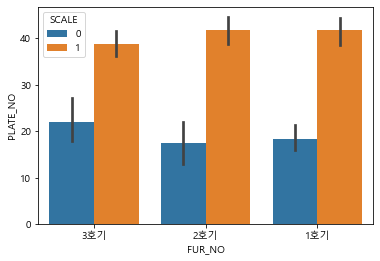

In [22]:
sns.barplot(data=gb_steel, x='FUR_NO', hue='SCALE', y='PLATE_NO')

- 생산시설이 불량품 생산확률에 대한 영향이 거의 없다고 판단할 수 있다.

In [14]:
# 김경태 제시할 인사이트
# 생산시설과 작업그룹별 양품 불량이 달라질 것이다.